[View in Colaboratory](https://colab.research.google.com/github/AkshayRam12/Notebooks/blob/master/MNIST_NeuralNet.ipynb)

## This is a simple neural network to demonstrate the basic functionality.
## We will define the model and train it to recognize handwritten digits using the MNIST dataset

In [0]:
# import the required packages and libraries

import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist

import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.utils import np_utils

training data size =  (60000, 28, 28)
test data size =  (10000, 28, 28)


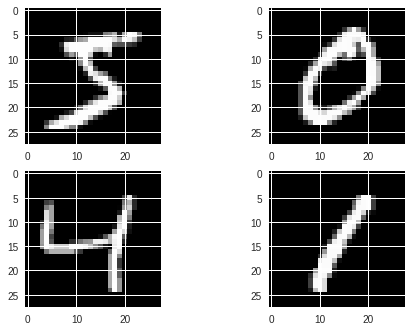

In [23]:
# load the mnist dataset and display samples using matplotlib 

(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

# printing size of datasets 
print("training data size = " , X_train.shape) # size of entire training dataset
print("test data size = " , X_test.shape)  # size of entire test dataset

# plotting the sample gray scal images

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

#display
plt.show()

In [24]:
# fix random seed 
seed = 7
numpy.random.seed(seed)

# input images are of size 28*28. Since this is a general neural net we have to reshape the input to 784 vector 
# This is called flattening the input 

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize the input from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

# encode labels to one hot encoding format
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

print("num classes = ", num_classes)

num classes =  10


In [0]:
# define the model

def base_model():
  #crete model
  model = Sequential()
  model.add(Dense(512, input_shape=(num_pixels,)))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  
  model.add(Dense(10))
  model.add(Activation('softmax'))
  
  #compile the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
               

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2752 - acc: 0.9176 - val_loss: 0.1165 - val_acc: 0.9636
Epoch 2/10
 - 8s - loss: 0.1057 - acc: 0.9678 - val_loss: 0.0904 - val_acc: 0.9710
Epoch 3/10
 - 8s - loss: 0.0728 - acc: 0.9769 - val_loss: 0.0800 - val_acc: 0.9756
Epoch 4/10
 - 8s - loss: 0.0565 - acc: 0.9823 - val_loss: 0.0661 - val_acc: 0.9807
Epoch 5/10
 - 8s - loss: 0.0446 - acc: 0.9859 - val_loss: 0.0647 - val_acc: 0.9799
Epoch 6/10
 - 8s - loss: 0.0366 - acc: 0.9881 - val_loss: 0.0699 - val_acc: 0.9802
Epoch 7/10
 - 8s - loss: 0.0331 - acc: 0.9886 - val_loss: 0.0641 - val_acc: 0.9826
Epoch 8/10
 - 8s - loss: 0.0298 - acc: 0.9901 - val_loss: 0.0748 - val_acc: 0.9806
Epoch 9/10
 - 8s - loss: 0.0252 - acc: 0.9916 - val_loss: 0.0723 - val_acc: 0.9811
Epoch 10/10
 - 8s - loss: 0.0240 - acc: 0.9916 - val_loss: 0.0659 - val_acc: 0.9818


Results :


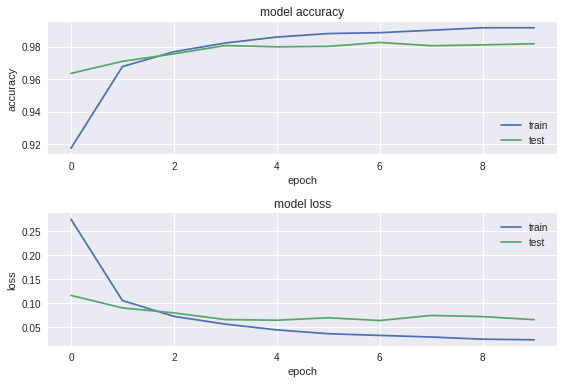

In [32]:
# build model
model = base_model()

# fit the model ( training)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)

# plotting metrics

print("\n\nResults :")
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()